In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
import seaborn as sns
sns.set_theme(style = 'whitegrid')
from PIL import Image
import os

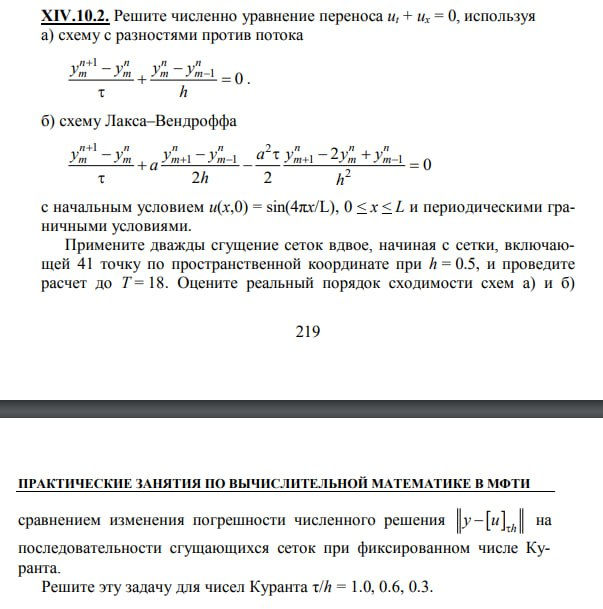

In [12]:
def u(x, L):
    return np.sin(4 * pi * x / L)

In [25]:
class Solver:

    def __init__(self, L, T, CFL, h, f, method_name):
        self.L = L
        self.T = T
        self.CFL = CFL
        self.h = h
        self.u = f
        self.method_name = method_name

        self.tau = self.CFL * self.h

        self.NX = int(self.L / self.h + 1)
        self.TX = int(self.T / self.tau + 1) 

        self.x_i = np.array([(i - 1) * self.h for i in range(1, self.NX + 1)])
        self.t_i = np.array([(i - 1) * self.tau for i in range(1, self.TX + 1)])

        self.u_n_m = self.u(self.x_i, self.L)
        self.u_next_m = self.u_n_m.copy()

    def solveAndCreateGif(self):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.x_i, self.u_n_m, color = 'grey')
        plt.ylim([1.2, -1.2])
        plt.title(f'{self.method_name}\nt = {self.t_i[0]:.2f}, CFL = {self.CFL}, h = {self.h}',
                fontsize=14)
        if not os.path.exists(f'./img/{self.method_name}_CFL{self.CFL}_h{self.h}'):
                    os.mkdir(f'./img/{self.method_name}_CFL{self.CFL}_h{self.h}')
        plt.savefig(f'./img/{self.method_name}_CFL{self.CFL}_h{self.h}/img_{0}.png', 
                transparent = False,  
                facecolor = 'white'
                )
        plt.close()

        for t in range(1, self.TX):
            if self.method_name == 'Ugolok':
                for i in range(1, self.NX):
                    self.u_next_m[i] = (1 - self.CFL) * self.u_n_m[i] + self.CFL * self.u_n_m[i - 1]

                self.u_next_m[0] = self.u_next_m[self.NX - 1]
            elif self.method_name == 'LW':
                for i in range(1, self.NX - 1):
                    self.u_next_m[i] = (self.CFL ** 2 + self.CFL) / 2 * self.u_n_m[i - 1] + (1 - self.CFL ** 2) * self.u_n_m[i] + (self.CFL ** 2 - self.CFL) / 2 * self.u_n_m[i + 1]

                self.u_next_m[self.NX - 1] = (self.CFL ** 2 + self.CFL) / 2 * self.u_n_m[self.NX - 2] + (1 - self.CFL ** 2) * self.u_n_m[self.NX - 1] + (self.CFL ** 2 - self.CFL) / 2 * self.u_n_m[0]
                self.u_next_m[0] = (self.CFL ** 2 + self.CFL) / 2 * self.u_n_m[self.NX - 1] + (1 - self.CFL ** 2) * self.u_n_m[0] + (self.CFL ** 2 - self.CFL) / 2 * self.u_n_m[1]
            else:
                raise Exception('Нет такого метода')
            
            plt.figure(figsize=(10, 6))
            plt.scatter(self.x_i, self.u_next_m, color = 'grey')
            plt.ylim([-1.2, 1.2])
            plt.title(f'{self.method_name}\nt = {self.t_i[t]:.2f}, CFL = {self.CFL}, h = {self.h}',
            fontsize=14)
            plt.savefig(f'./img/{self.method_name}_CFL{self.CFL}_h{self.h}/img_{t}.png', 
            transparent = False,  
            facecolor = 'white'
            )
            plt.close()

            self.u_n_m = self.u_next_m.copy()

        image_path_list = [f'./img/{self.method_name}_CFL{self.CFL}_h{self.h}/img_{i}.png' for i in range(self.TX)]
        image_list = [Image.open(file) for file in image_path_list]
        image_list[0].save(
                f'gifs/{self.method_name}_CFL{self.CFL}_h{self.h}.gif',
                save_all=True,
                append_images=image_list[1:], # append rest of the images
                duration=0.08, # in milliseconds
                loop=0)
        
    def setCFL(self, cfl):
        self.CFL = cfl

    def setH(self, h):
        self.h = h

    def setL(self, L):
        self.L = L

    def setT(self, T):
        self.T = T

    def reInit(self):
        self.tau = self.CFL * self.h

        self.NX = int(self.L / self.h + 1)
        self.TX = int(self.T / self.tau + 1) 

        self.x_i = np.array([(i - 1) * self.h for i in range(1, self.NX + 1)])

        self.u_n_m = self.u(self.x_i, self.L)
        self.u_next_m = self.u_n_m.copy()

In [26]:
Ugolok = Solver(20, 18, 0.6, 0.5, u, 'Ugolok')

cfls = [0.6, 1, 1.01, 1.1]

for cfl in cfls:
    Ugolok.setCFL(cfl)
    Ugolok.reInit()
    Ugolok.solveAndCreateGif()

In [27]:
LaxWendroff = Solver(20, 18, 0.6, 0.5, u, 'LW')

cfls = [0.6, 1, 1.01, 1.1]

for cfl in cfls:
    LaxWendroff.setCFL(cfl)
    LaxWendroff.reInit()
    LaxWendroff.solveAndCreateGif()